### Mean Shift 개요
- 데이터의 분포도를 이용해 centroid를 찾음. centroid는 게이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 PDF를 이용함.
- 가장 집중적으로 데이터가 모여있어 PDF가 피크인 점을 centroid로 선정하여 일반적으로 주어진 모델의 PDF를 찾기 위해 KDE(Kernel Density Estimation)을 사용
##### 과정
1) 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Sifht 알고리즘으로 계산
2) KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3) 모든 데이터를 1~2까지 수행하면서 데이터를 이동. 개별 데이터들이 centroid로 모임
4) 지정 Iter 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
5) 개별 데이터들이 모인 중심점을 centroid로 설정
##### 특징
- 대역폭(h)이 클수록 평활화된 KDE로 인해 적은 수의 centroid를 가지며 대역폭이 작을수록 많은 수의 centroid를 가짐
- 오직 대역폭의 크기에 따라 군집화를 수행함
##### 장점
- 데이터 셋의 형태를 특정 형태로 가정한다던가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화 가능
- 이상치의 영향력이 크지 않고 미리 군집의 개수를 정할 필요가 없음
##### 단점
- 알고리즘 수행 시간이 오래걸림
- 대역폭의 크기에 따른 군집화의 영향도가 매우 큼

-> 위 특징 때문에 일반적으로 CV 영역에서 더 많이 사용됨. 이미지 혹은 영상에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 함

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8) # 대역폭에 해당함
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [10]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [11]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [12]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


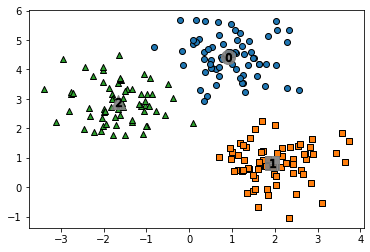

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [14]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64
